### ITER

In [1]:
import time
import numpy as np
import nexpy as nxp
import minterpy as mp
from IPython.display import display, Math

In [2]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

### ITER: Introductory Example

In [3]:
# PARAMETERS: m, n and p

spatial_dimension = 4 
poly_degree = 2 
p_degree = 1 

In [4]:
# COMPUTATIONS

mis = [
    nxp.utils.get_exponent_matrix_iterative(spatial_dimension, poly_degree, p_degree),
    mp.core.utils.get_exponent_matrix(spatial_dimension, poly_degree, p_degree)]

# Verify the validity of all four different methods for given m, n, p
verify = sum([sum(sum(abs(np.array(mis[i])-np.array(mis[i+1])))) for i in range(1)])

In [5]:
# OUTPUTS

# Display the error of verification
display(Math(f'\\varepsilon = {verify:.3e}'))

# Display the p-degree multi-index set
display(Math(
    "A_{4,2,1} =" + str(mis[0].tolist()).replace("[","(").replace("]",")")))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### ITER: Experiments

In [6]:
# Methods

def runtime_stat(spatial_dimension:int, poly_degree: int, p_degree: float):
    res = [] # [ITER, POST, MOD POST, MINTERPY]
    
    # ITER
    start_time = time.time()
    nxp.utils.get_exponent_matrix_iterative(spatial_dimension, poly_degree, p_degree)
    res.append((time.time() - start_time)*1e3)
    
    # MINTERPY
    start_time = time.time()
    mp.core.utils.get_exponent_matrix(spatial_dimension, poly_degree, p_degree)
    res.append((time.time() - start_time)*1e3)
    
    # Return results
    return res

In [9]:
# Parameters

captures = ["ITER", "MINTERPY"]

p_sample = [1.0, 2.0, np.infty]

n_samples = [
    [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]]


#n_samples = [
#    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
#    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]]

m_sample = [2, 3]

# Experiment iterations
I = 10 

In [10]:
# Computation : Experiments

res_exps = {}
progress_bar = display(nxp.visual.html.progress_bar(0), display_id=True)

iter_amount = len(p_sample)*sum([len(n_sample) for n_sample in n_samples])
total_amount = iter_amount*I
total_count = 0

# [m][p][i][n]
for i_m, m in enumerate(m_sample):
    res_exps[str(m)] = {}
    for p in p_sample:
        res_exps[str(m)][str(p)] = []
        for i in range(I):
            helper = []
            for n in n_samples[i_m]:
                helper.append(
                    runtime_stat(spatial_dimension = m, poly_degree = n, p_degree = p))
            
                # Update progress bar
                total_count += 1
                progress = int(100*total_count/total_amount)
                progress_bar.update(nxp.visual.html.progress_bar(progress))
            res_exps[str(m)][str(p)].append(np.array(helper))

In [11]:
# Computation: Characterics

# Compute the mean values
res_exps_mean = np.array([[
    np.mean(res_exps[str(m)][str(p)], axis=0)
    for p in p_sample] for m in m_sample])

# Compute the standard deviations
res_exps_var = np.array([[
    np.sqrt(np.sum((res_exps[str(m)][str(p)]-np.array([res_exps_mean[i][j]]*I))**2, axis=0))
    for j, p in enumerate(p_sample)] for i, m in enumerate(m_sample)])

# Prepare variance plot
sigma_upper = res_exps_mean + res_exps_var
sigma_lower = res_exps_mean - res_exps_var

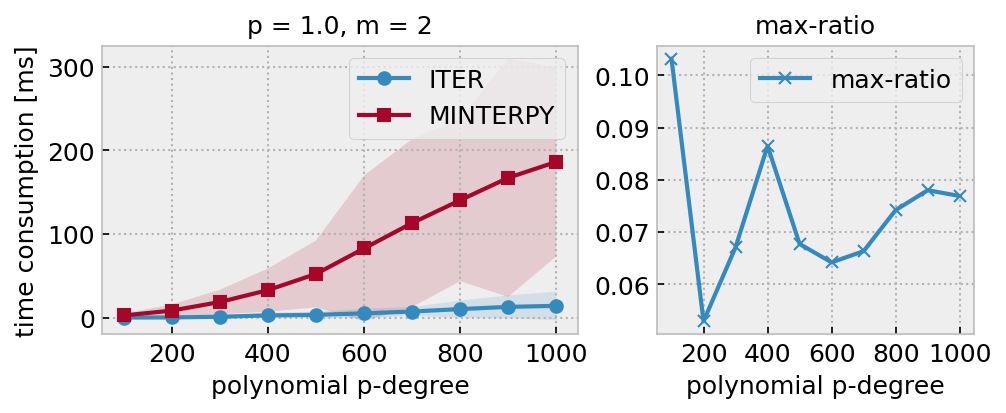

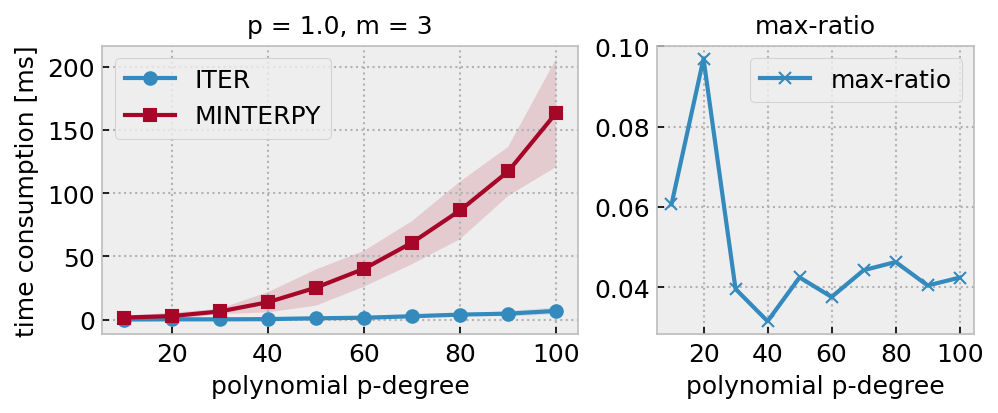

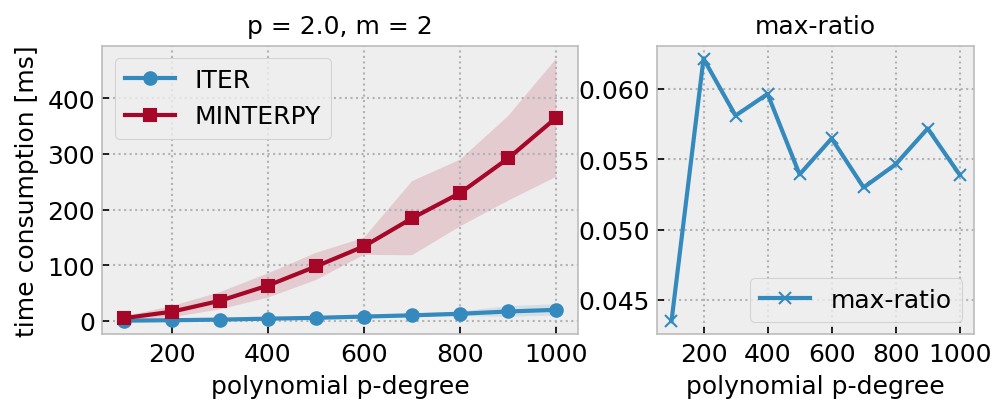

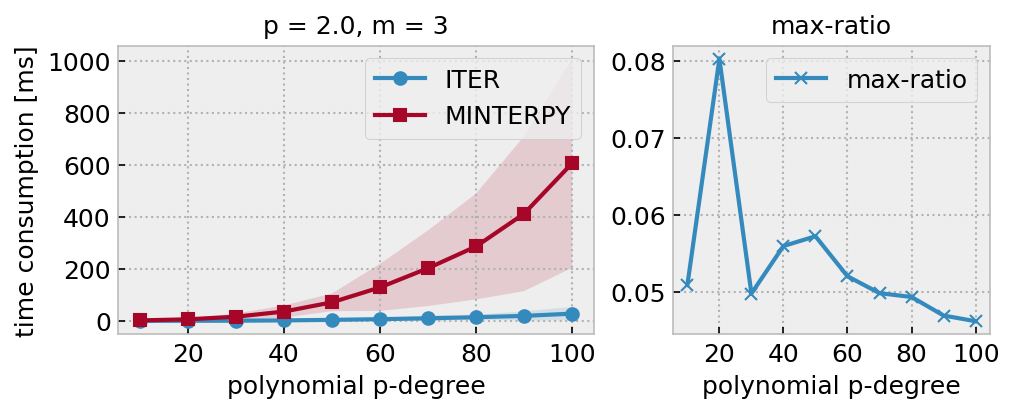

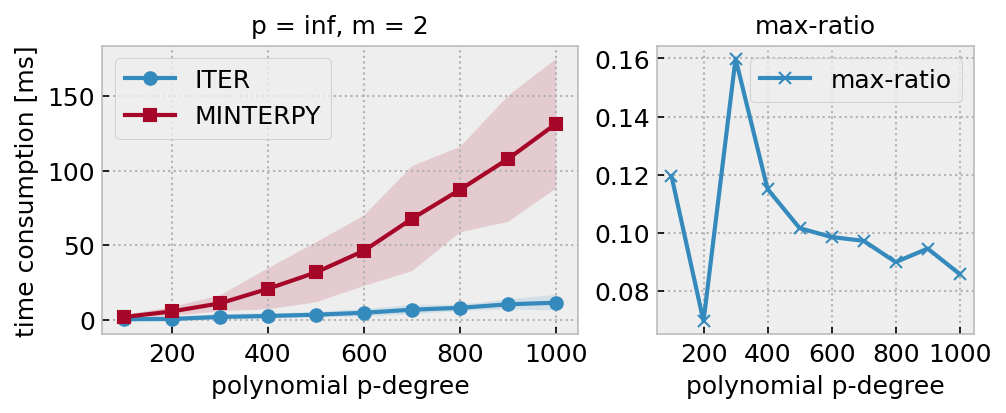

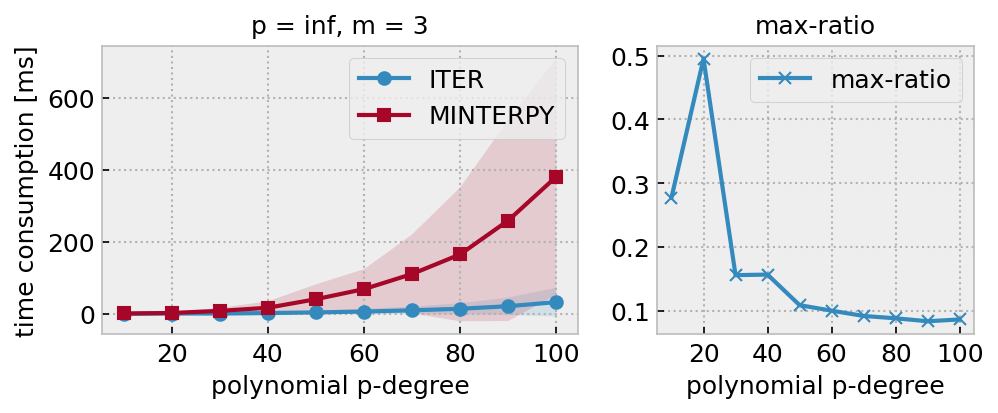

In [12]:
# Outputs : Benchmark
for i_p in range(len(p_sample)):
    for i_m in range(len(m_sample)):
        nxp.visual.plot.experiment(
            xticks   =n_samples[i_m],
            plots    =[{'data': res_exps_mean[i_m][i_p].T[i], 
                        'sigma_upper': sigma_upper[i_m][i_p].T[i],
                        'sigma_lower': sigma_lower[i_m][i_p].T[i],
                        'label': captures[i]} for i in range(len(captures))],
            title    =f'p = {p_sample[i_p]}, m = {m_sample[i_m]}',
            xlabel   ='polynomial p-degree',
            ylabel   ='time consumption [ms]',
            ylogscale=False,
            xlogscale=False,
            markers = True)